# Ejercicio Obligatorio 2

In [7]:
import numpy as np
import pandas as pd
import csv

import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_theme()

### Carga de datos de entrada

In [8]:
data = []
with open('europe.csv', newline='\n') as File:
    reader = csv.reader(File)
    header = next(reader)
    for country, *row in reader:
        data.append([country] + list(map(float, row))) #type: ignore

countries = [row[0] for row in data]
data = [row[1:] for row in data]
original_df = pd.DataFrame(data, columns=header[1:], index=countries)
original_df

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
Austria,83871.0,41600.0,3.5,79.91,0.80,0.03,4.2
Belgium,30528.0,37800.0,3.5,79.65,1.30,0.06,7.2
Bulgaria,110879.0,13800.0,4.2,73.84,2.60,-0.80,9.6
Croatia,56594.0,18000.0,2.3,75.99,2.39,-0.09,17.7
Czech Republic,78867.0,27100.0,1.9,77.38,1.15,-0.13,8.5
Denmark,43094.0,37000.0,2.8,78.78,1.30,0.24,6.1
Estonia,45228.0,20400.0,5.0,73.58,2.00,-0.65,12.5
Finland,338145.0,36000.0,3.3,79.41,2.00,0.07,7.8
Germany,357022.0,38100.0,2.5,80.19,1.50,-0.20,6.0
Greece,131957.0,26300.0,3.3,80.05,4.30,0.06,17.4


### Calculo de autovectores

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
PC1,0.124874,-0.500506,0.406518,-0.482873,0.188112,-0.475704,0.271656
PC2,-0.172872,-0.130140,-0.369657,0.265248,0.658267,0.082622,0.553204
PC3,0.898297,0.083956,0.198195,0.246082,0.243679,0.163697,0.000500
PC4,0.044850,-0.084255,0.164686,0.026771,-0.562375,0.392463,0.701968
PC5,-0.324017,0.390632,0.689501,-0.101787,0.368148,0.347868,0.010159
PC6,0.190118,0.638657,-0.323867,-0.606434,0.035596,-0.120856,0.259705
PC7,0.066643,-0.397408,-0.226700,-0.507031,0.137310,0.671147,-0.244662


<AxesSubplot:>

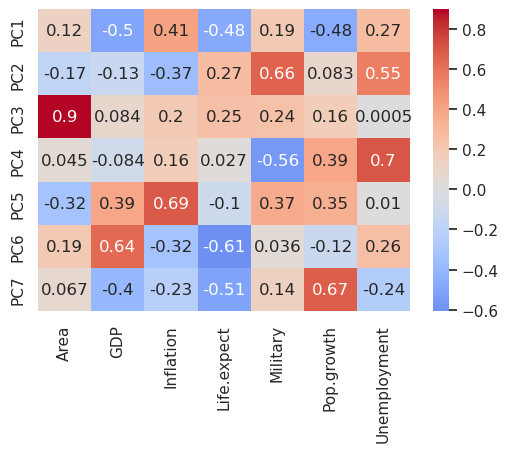

In [9]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data)
model_pca = pca_pipe.named_steps['pca']


df = pd.DataFrame(
    data=model_pca.components_,
    columns=header[1:],
    index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
)

eigenvalues = model_pca.explained_variance_ratio_
cumsum = np.cumsum(eigenvalues)

display(df)

cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(df, cmap=cmap, center=0, annot=True)

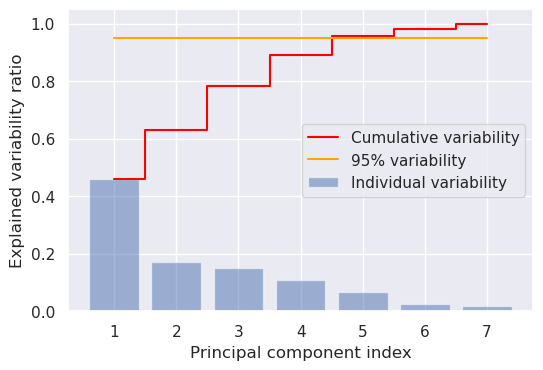

In [10]:
plt.bar(range(1, len(eigenvalues)+1), eigenvalues, alpha=0.5, align='center',
        label='Individual variability')
plt.step(range(1, len(eigenvalues)+1), cumsum, where='mid',
         label='Cumulative variability',
         color='red')
plt.ylabel('Explained variability ratio')
plt.xlabel('Principal component index')
plt.plot([1, len(eigenvalues)], [.95]*2, color='orange', label="95% variability")
plt.legend()

In [11]:
projections = pca_pipe.transform(X=data)
projections = pd.DataFrame(
    projections,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'],
    index=countries
)
projections.head()

merged = original_df.join(projections)
# pc1 = projections['PC1']
# pc1 = pc1.sort_values()

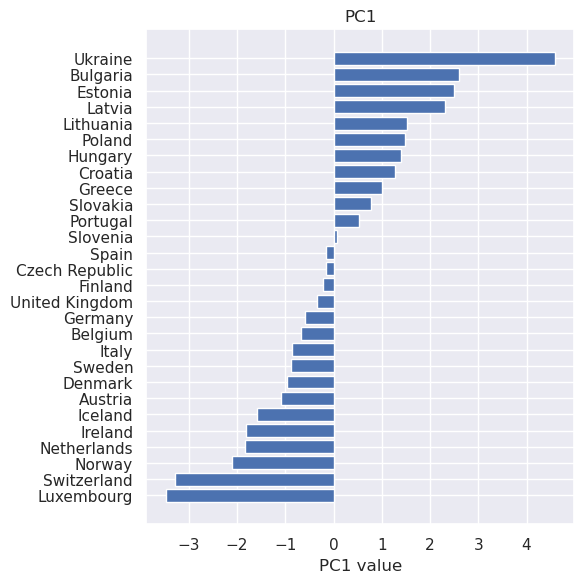

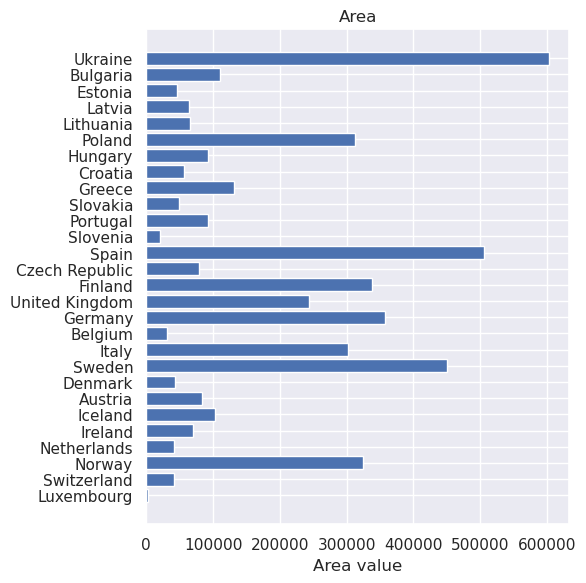

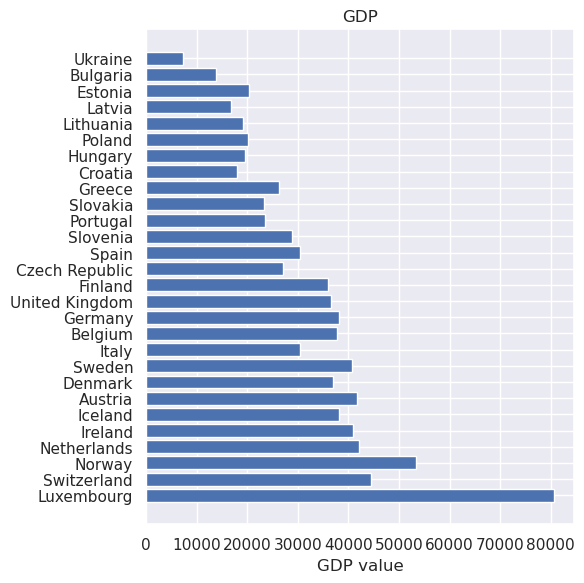

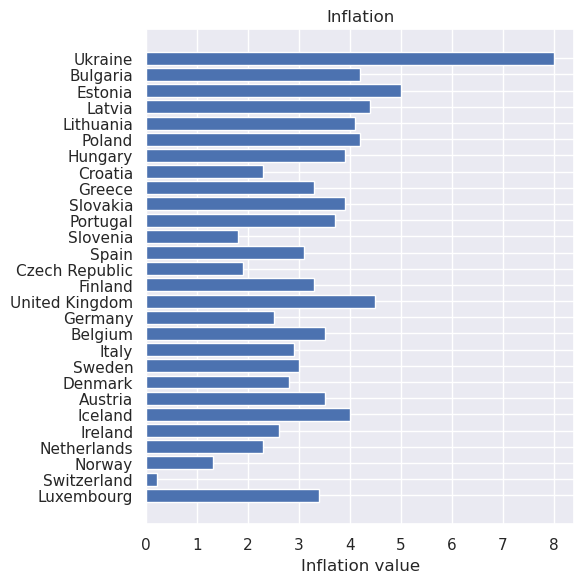

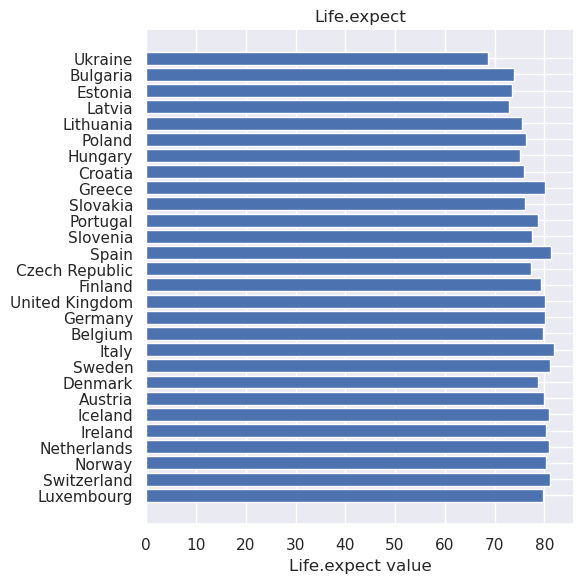

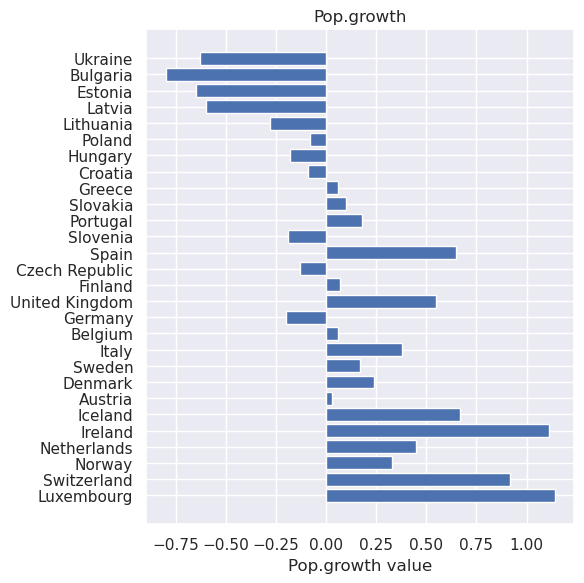

In [12]:
merged.sort_values(by=['PC1'], inplace=True)

def plot_var(var: str):
    fig, ax = plt.subplots(1,1,figsize=(6,6))
    r = np.arange(len(merged))
    ax.set_yticks(r, labels=merged.index)
    # ax.invert_yaxis()

    ax.set_title(var)
    ax.set_xlabel(f'{var} value')
    ax.barh(r, np.array(merged[var]))
    # ax2 = ax.twiny()
    # gdp = np.array(merged['Area'])
    # ax2.plot(gdp, r, marker="D", alpha=0.6, color='red', linestyle="", markersize=3)
    # plt.grid(None)
    plt.tight_layout()

plot_var('PC1')
plot_var('Area')
plot_var('GDP')
plot_var('Inflation')
plot_var('Life.expect')
plot_var('Pop.growth')